# EDA Análise de Churn


## Contexto do Notebook

Neste notebook, realizarei uma análise exploratória de dados (EDA). O objetivo principal aqui é descobrir insights que nos darão informações valiosas sobre os padrões dos funcionários que saem dentro dos recursos disponíveis. Assim, mesmo antes de construir um modelo, será possível ajudar a empresa com alguns perfis e tendências de funcionários que saem. Além disso, abordarei esses passos em detalhes abaixo, explicando por que estou tomando cada decisão.

- ### Objetivos do Notebook?
1. Realizar uma análise exploratória de dados para descobrir insights sobre os padrões dos funcionários que saem.
2. Utilizar os recursos disponíveis para ajudar a empresa com perfis e tendências dos funcionários que saem.
3. Abordar os passos em detalhes, explicando por que está tomando cada decisão.

- ### Resultados esperados

Espera-se obter informações valiosas sobre os padrões dos funcionários que saem, antes mesmo de construir um modelo. Isso poderá ajudar a empresa a identificar perfis e tendências dos funcionários que saem, fornecendo insights úteis para a gestão de recursos humanos e retenção de talentos. Também irei fazer um pré processamento dos dados (limpeza e tratamento) para a posterior construção de modelos preditivos.



## Importação das bibliotecas e base de dados

- Base de dados: https://www.kaggle.com/pavansubhasht/

In [1]:
# Visualização e Manipulação dos Dados
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importação da base de dados
base = pd.read_csv('/content/Human_Resources.csv')

In [3]:
# Verificando o tamanho do dataset
base.shape

(1470, 35)

In [4]:
#Observação geral do dataset
base.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Dicionário dos dados

#### - Target (Alvo)

- **Attrition**: Indica se o funcionário deixou a empresa (Yes: 1) ou permaneceu (No: 0).

#### **- Dados Categóricos**:

- **BusinessTravel**: Nível de viagem de negócios do funcionário (Baixo, Médio, Alto).
- **Department**: Departamento em que o funcionário trabalha (Vendas, Pesquisa e Desenvolvimento, RH).
- **EducationField**: Área de educação do funcionário (Ciências da Vida, Marketing, Medicina, etc.).
- **Gender**: Gênero do funcionário (Masculino, Feminino).
- **JobRole**: Cargo do funcionário (Gerente, Representante de Vendas, Técnico de Laboratório, etc.).
- **MaritalStatus**: Estado civil do funcionário (Solteiro, Casado, Divorciado).

#### **- Dados Numéricos**:

- **Age**: Idade do funcionário.
- **DailyRate**: Taxa diária de pagamento do funcionário.
- **DistanceFromHome**: Distância da casa do funcionário até o local de trabalho.
- **Education**: Nível de educação do funcionário (1: Abaixo da faculdade, 2: - Faculdade, 3: Bacharel, 4: Mestre, 5: Doutor).
- **EnvironmentSatisfaction**: Nível de satisfação com o ambiente de trabalho (1: Baixo, 2: Médio, 3: Alto, 4: Muito Alto).
- **HourlyRate**: Taxa de pagamento por hora do funcionário.
- **JobInvolvement**: Nível de envolvimento com o trabalho (1: Baixo, 2: Médio, 3: Alto, 4: Muito Alto).
- **JobLevel**: Nível do cargo do funcionário.
- **JobSatisfaction**: Nível de satisfação com o trabalho (1: Baixo, 2: Médio, 3: Alto, 4: Muito Alto).
- **MonthlyIncome**: Renda mensal do funcionário.
- **MonthlyRate**: Taxa mensal de pagamento do funcionário.
- **NumCompaniesWorked**: Número de empresas em que o funcionário trabalhou anteriormente.
- **OverTime**: Se o funcionário trabalha horas extras (Sim, Não).
- **PercentSalaryHike**: Aumento percentual no salário do funcionário.
- **PerformanceRating**: Avaliação de desempenho do funcionário (1: Baixo, 2: Bom, 3: Excelente, 4: Excepcional).
- **RelationshipSatisfaction**: Nível de satisfação com o relacionamento no trabalho (1: Baixo, 2: Médio, 3: Alto, 4: Muito Alto).
- **StockOptionLevel**: Nível de opção de compra de ações do funcionário.
- **TotalWorkingYears**: Total de anos trabalhados pelo funcionário.
- **TrainingTimesLastYear**: Número de vezes que o funcionário foi treinado no ano passado.
- **WorkLifeBalance**: Equilíbrio entre trabalho e vida pessoal do funcionário (1: Ruim, 2: Bom, 3: Melhor, 4: Ótimo).
- **YearsAtCompany**: Número de anos que o funcionário trabalhou na empresa atual.
- **YearsInCurrentRole**: Número de anos que o funcionário está no cargo atual.
- **YearsSinceLastPromotion**: Número de anos desde a última promoção do funcionário.
- **YearsWithCurrManager**: Número de anos trabalhando com o gerente atual.
- **EmployeeCount** (Contagem de Funcionários): Número de funcionários.
- **StandardHours** (Horas Padrão): Número padrão de horas trabalhadas.
- **Over18** (Acima de 18 anos): Indicação se o funcionário é maior de 18 anos.
- **EmployeeNumber** (Número do Funcionário): Número identificador único para cada funcionário.

In [5]:
#Informações gerais sobre os dados
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
#Informações estatísticas sobre os dados
base.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
# Calculando o Salário Médio dos funcionários da empresa (geral, que saem, que ficam). Essa métrica será bastante importante para demonstrar quanto o modelo que iremos criar contribui financeiramente para a empresa.

# Calcula a média dos salários mensais dos funcionários com 'Attrition' igual a 'Yes'
media_salarios_churn = base[base['Attrition'] == 'Yes']['MonthlyIncome'].mean()
print("Média dos salários mensais dos funcionários que saem da empresa:", media_salarios_churn)

# Calcula a média dos salários mensais dos funcionários com 'Attrition' igual a 'No'
media_salarios_churn = base[base['Attrition'] == 'No']['MonthlyIncome'].mean()
print("Média dos salários mensais dos funcionários que ficam da empresa:", media_salarios_churn)

# Calcula a média dos salários mensais dos funcionários com 'Attrition' igual a 'No'
media_salarios_churn = base['MonthlyIncome'].mean()
print("Média dos salários mensais dos funcionários da empresa:", media_salarios_churn)


Média dos salários mensais dos funcionários que saem da empresa: 4787.0928270042195
Média dos salários mensais dos funcionários que ficam da empresa: 6832.739659367397
Média dos salários mensais dos funcionários da empresa: 6502.931292517007


## Vizualização e Tratamento dos dados

In [8]:
# Transformando dados categoricos binarios
base['Attrition'] = base['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
base['OverTime'] = base['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
base['Over18'] = base['Over18'].apply(lambda x: 1 if x == 'Y' else 0)

<Axes: >

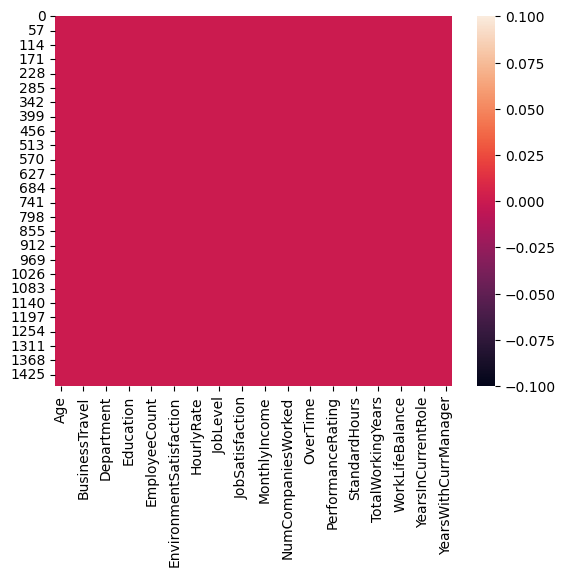

In [9]:
# Para vizualizar valores nulos:
sns.heatmap(base.isnull())

Pode-se observar que não existem valores nulos, o que é ótimo para a análise e modelagem preditiva.

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Attrition'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'EmployeeCount'}>,
        <Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>],
       [<Axes: title={'center': 'JobLevel'}>,
        <Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>],
       [<Axes: title={'center': 'Over18'}>,
        <Axes: title={'center': 'OverTime'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'Relations

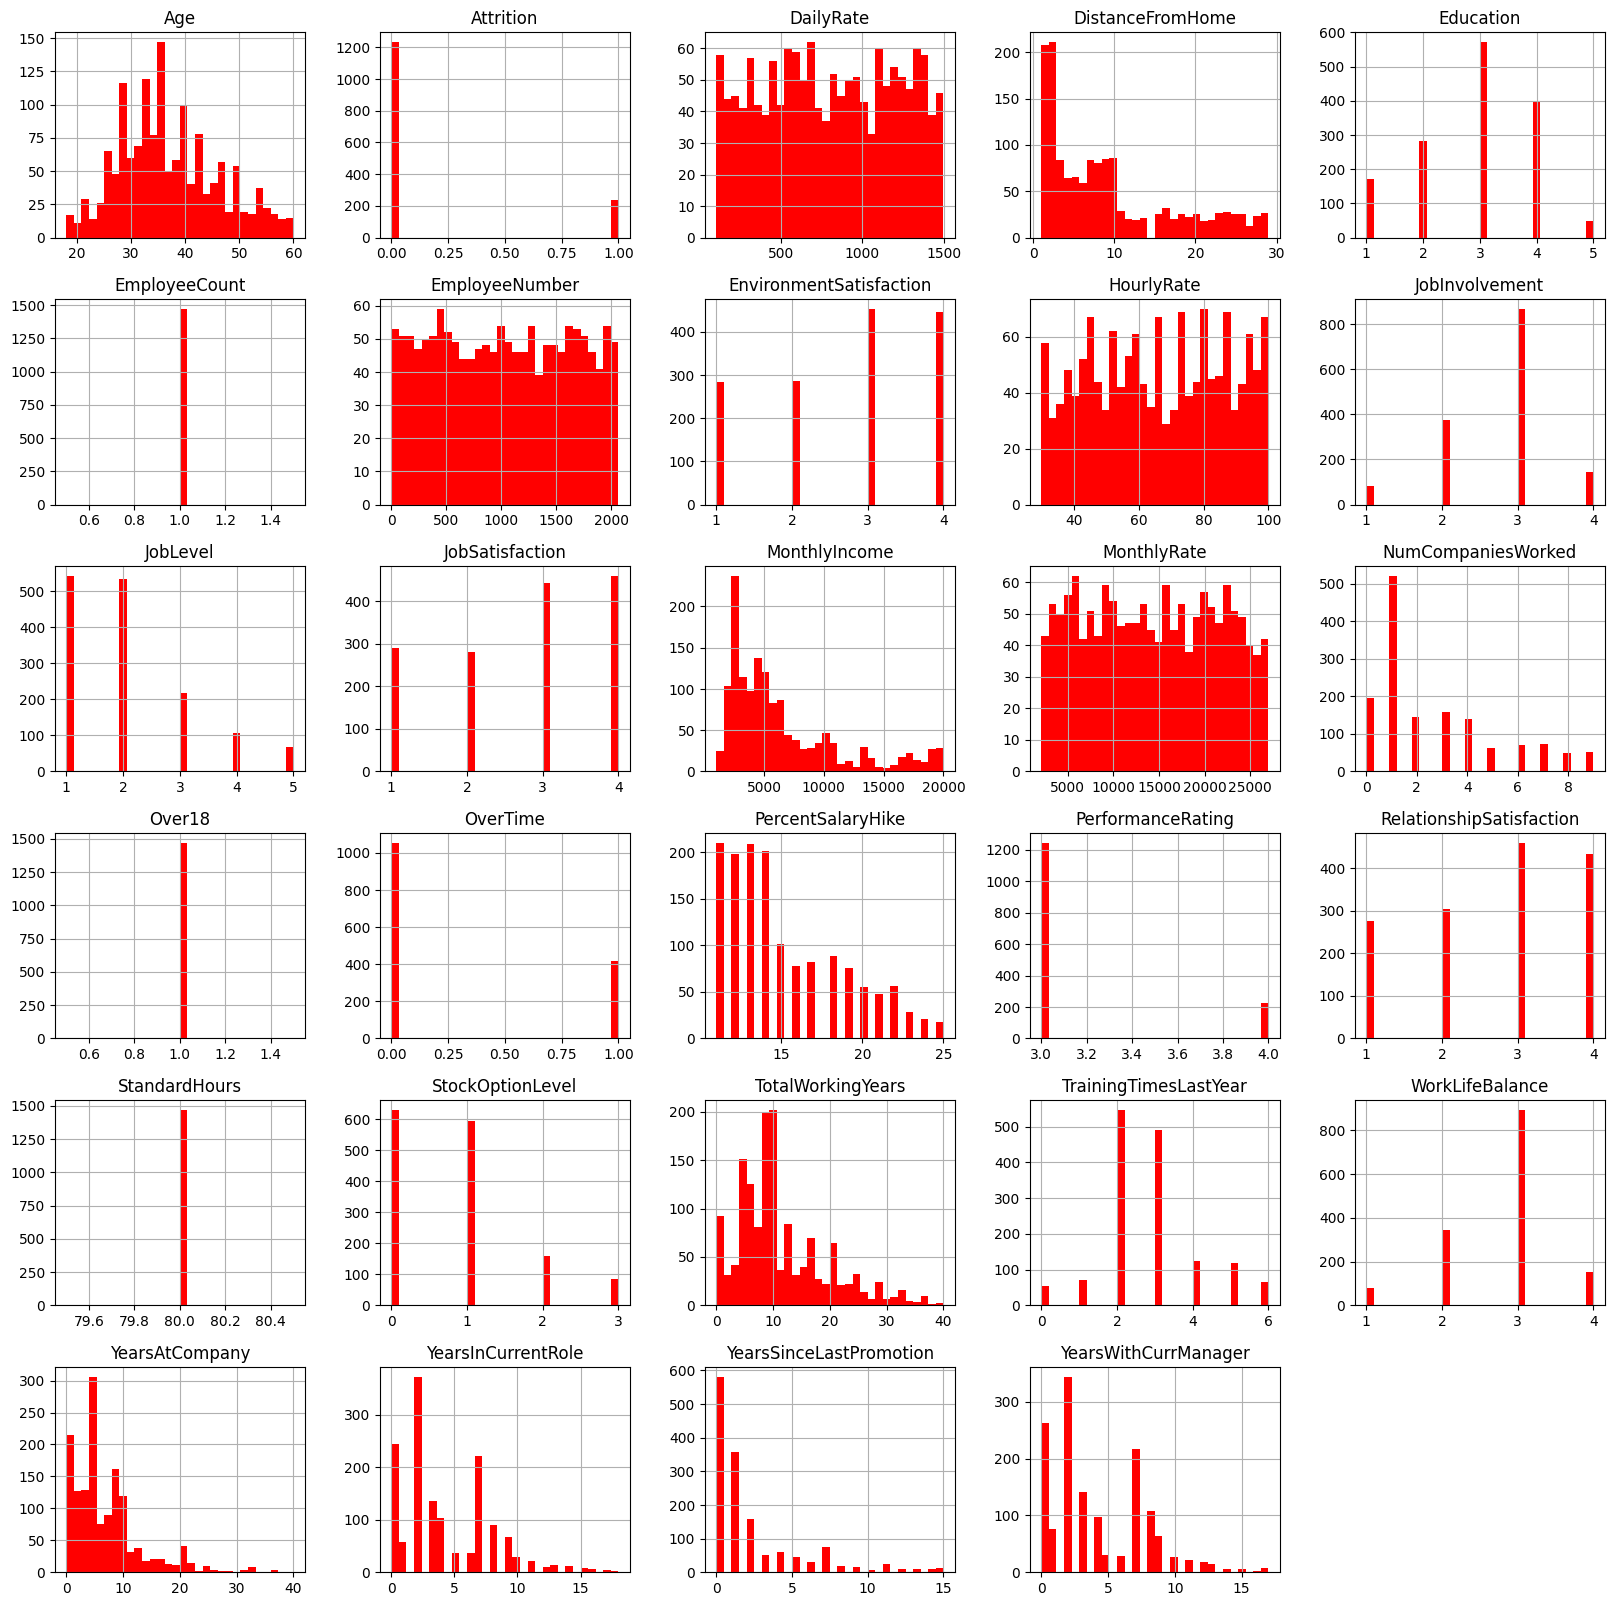

In [10]:
# Vou gerar gráficos que descrevem de forma geral, cada um dos atributos numéricos e o alvo do dataset
base.hist(bins = 30, figsize = (20,20), color = 'r')

É possível observar que os atributos 'EmployeeCount', 'StandardHours', 'Over18' e 'EmployeeNumber' não influenciarão na análise, pois apresentam valores constantes ou são chaves primárias para todos os candidatos.

In [11]:
# Excluindo as colunas que não irão influenciar na análise
base.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis = 1, inplace = True)

In [12]:
# Verificando se as colunas foram exluídas
base.shape

(1470, 31)

Agora, vou converter as colunas categóricas em valores numéricos, pois isso permite que os algoritmos de machine learning aprendam melhor com os dados. Se atribuirmos valores diretamente para cada uma das opções, os algoritmos podem interpretar valores mais altos como prioridades, o que não é o caso. Para isso, vamos utilizar o método OneHotEncoder.

Temos as seguintes colunas categóricas:

- **BusinessTravel**: Nível de viagem de negócios do funcionário (Baixo, Médio, Alto).
- **Department**: Departamento em que o funcionário trabalha (Vendas, Pesquisa e Desenvolvimento, RH).
- **EducationField**: Área de educação do funcionário (Ciências da Vida, Marketing, Medicina, etc.).
- **Gender**: Gênero do funcionário (Masculino, Feminino).
- **JobRole**: Cargo do funcionário (Gerente, Representante de Vendas, Técnico de Laboratório, etc.).
- **MaritalStatus**: Estado civil do funcionário (Solteiro, Casado, Divorciado).

In [13]:
# Importando o OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Criando o encoder
ohe = OneHotEncoder(handle_unknown='ignore',dtype='int32')

In [14]:
#Fazendo o fit com a coluna 'BusinessTravel'
ohe = ohe.fit(base[['BusinessTravel']])
ohe.transform(base[['BusinessTravel']]).toarray()

# Transformando esse resultado em um DataFrame
ohe_df = pd.DataFrame(ohe.transform(base[['BusinessTravel']]).toarray(),columns=ohe.get_feature_names_out())

# Podemos agora adicionar essa coluna na nossa base de treino
base = pd.concat([base,ohe_df],axis=1)

#Verificando
ohe_df.head(3)

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,0,0,1
1,0,1,0
2,0,0,1


In [15]:
#Fazendo o fit com a coluna 'Department'
ohe = ohe.fit(base[['Department']])
ohe.transform(base[['Department']]).toarray()

# Transformando esse resultado em um DataFrame
ohe_df = pd.DataFrame(ohe.transform(base[['Department']]).toarray(),columns=ohe.get_feature_names_out())

# Podemos agora adicionar essa coluna na nossa base de treino
base = pd.concat([base,ohe_df],axis=1)

#Verificando
ohe_df.head(3)

,Department_Human Resources,Department_Research & Development,Department_Sales
0,0,0,1
1,0,1,0
2,0,1,0


In [16]:
#Fazendo o fit com a coluna 'EducationField'
ohe = ohe.fit(base[['EducationField']])
ohe.transform(base[['EducationField']]).toarray()

# Transformando esse resultado em um DataFrame
ohe_df = pd.DataFrame(ohe.transform(base[['EducationField']]).toarray(),columns=ohe.get_feature_names_out())

# Podemos agora adicionar essa coluna na nossa base de treino
base = pd.concat([base,ohe_df],axis=1)

#Verificando
ohe_df.head(3)

,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0


In [17]:
#Fazendo o fit com a coluna 'Gender'
ohe = ohe.fit(base[['Gender']])
ohe.transform(base[['Gender']]).toarray()

# Transformando esse resultado em um DataFrame
ohe_df = pd.DataFrame(ohe.transform(base[['Gender']]).toarray(),columns=ohe.get_feature_names_out())

# Podemos agora adicionar essa coluna na nossa base de treino
base = pd.concat([base,ohe_df],axis=1)

#Verificando
ohe_df.head(3)

,Gender_Female,Gender_Male
0,1,0
1,0,1
2,0,1


In [18]:
#Fazendo o fit com a coluna 'JobRole'
ohe = ohe.fit(base[['JobRole']])
ohe.transform(base[['JobRole']]).toarray()

# Transformando esse resultado em um DataFrame
ohe_df = pd.DataFrame(ohe.transform(base[['JobRole']]).toarray(),columns=ohe.get_feature_names_out())

# Podemos agora adicionar essa coluna na nossa base de treino
base = pd.concat([base,ohe_df],axis=1)

#Verificando
ohe_df.head(3)

,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0


In [19]:
#Fazendo o fit com a coluna 'MaritalStatus'
ohe = ohe.fit(base[['MaritalStatus']])
ohe.transform(base[['MaritalStatus']]).toarray()

# Transformando esse resultado em um DataFrame
ohe_df = pd.DataFrame(ohe.transform(base[['MaritalStatus']]).toarray(),columns=ohe.get_feature_names_out())

# Podemos agora adicionar essa coluna na nossa base de treino
base = pd.concat([base,ohe_df],axis=1)

ohe_df.head(3)

,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0,0,1
1,0,1,0
2,0,0,1


In [20]:
# Podemos então apagar as colunas categóricas originais já tratadas.
base = base.drop(['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus'],axis=1)

Agora vou dividir os dados em dois sub datasets. Um irá conter os dados dos funcionarios que sairam da empresa (base_sairam) e outro os funcionarios que ficaram (base_ficaram) na empresa

In [21]:
# Dividindo a base
base_sairam = base[base['Attrition'] == 1]
base_ficaram = base[base['Attrition'] == 0]

In [22]:
#Algumas informações sobre a quantidade e porcentagem relativa às bases

print('Total =', len(base))
print('Total que saiu =', len(base_sairam))
print('Total que ficou  =', len(base_ficaram))
print('Porcentagem dos que sairam = ', (len(base_sairam)/len(base)) * 100 )
print('Porcentagem dos que ficaram = ', (len(base_ficaram)/len(base)) * 100 )

Total = 1470
Total que saiu = 237
Total que ficou  = 1233
Porcentagem dos que sairam =  16.122448979591837
Porcentagem dos que ficaram =  83.87755102040816


In [23]:
# Descrição da base dos funcionarios que ficaram
base_ficaram.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,0.159773,0.078670,0.109489,0.063260,0.198702,0.218167,0.040552,0.238443,0.477697,0.283861
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.366544,0.269332,0.312379,0.243529,0.399185,0.413169,0.197329,0.426304,0.499705,0.451053
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
# Descrição da base dos funcionarios que ficaram
base_sairam.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,0.261603,0.021097,0.042194,0.008439,0.198312,0.240506,0.139241,0.139241,0.354430,0.506329
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.440438,0.144012,0.201457,0.091668,0.399572,0.428295,0.346930,0.346930,0.479353,0.501018
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
# Verificando agora se ainda existem valores categóricos na base
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 51 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EnvironmentSatisfaction            1470 non-null   int64
 6   HourlyRate                         1470 non-null   int64
 7   JobInvolvement                     1470 non-null   int64
 8   JobLevel                           1470 non-null   int64
 9   JobSatisfaction                    1470 non-null   int64
 10  MonthlyIncome                      1470 non-null   int64
 11  MonthlyRate                        1470 non-null   int64
 12  NumCompaniesWorked  

Considerando que a base de dados não possui mais valores categóricos, o próximo passo é gerar gráficos que proporcionem insights cruciais para compreender o problema em questão. Inicialmente, será criado um gráfico de correlação entre todas as colunas da base de dados. Esse gráfico permitirá visualizar a correlação 2 a 2 dos atributos entre si e com o target ('Attrition'), o que é fundamental para identificar possíveis relações e padrões nos dados.

<Axes: >

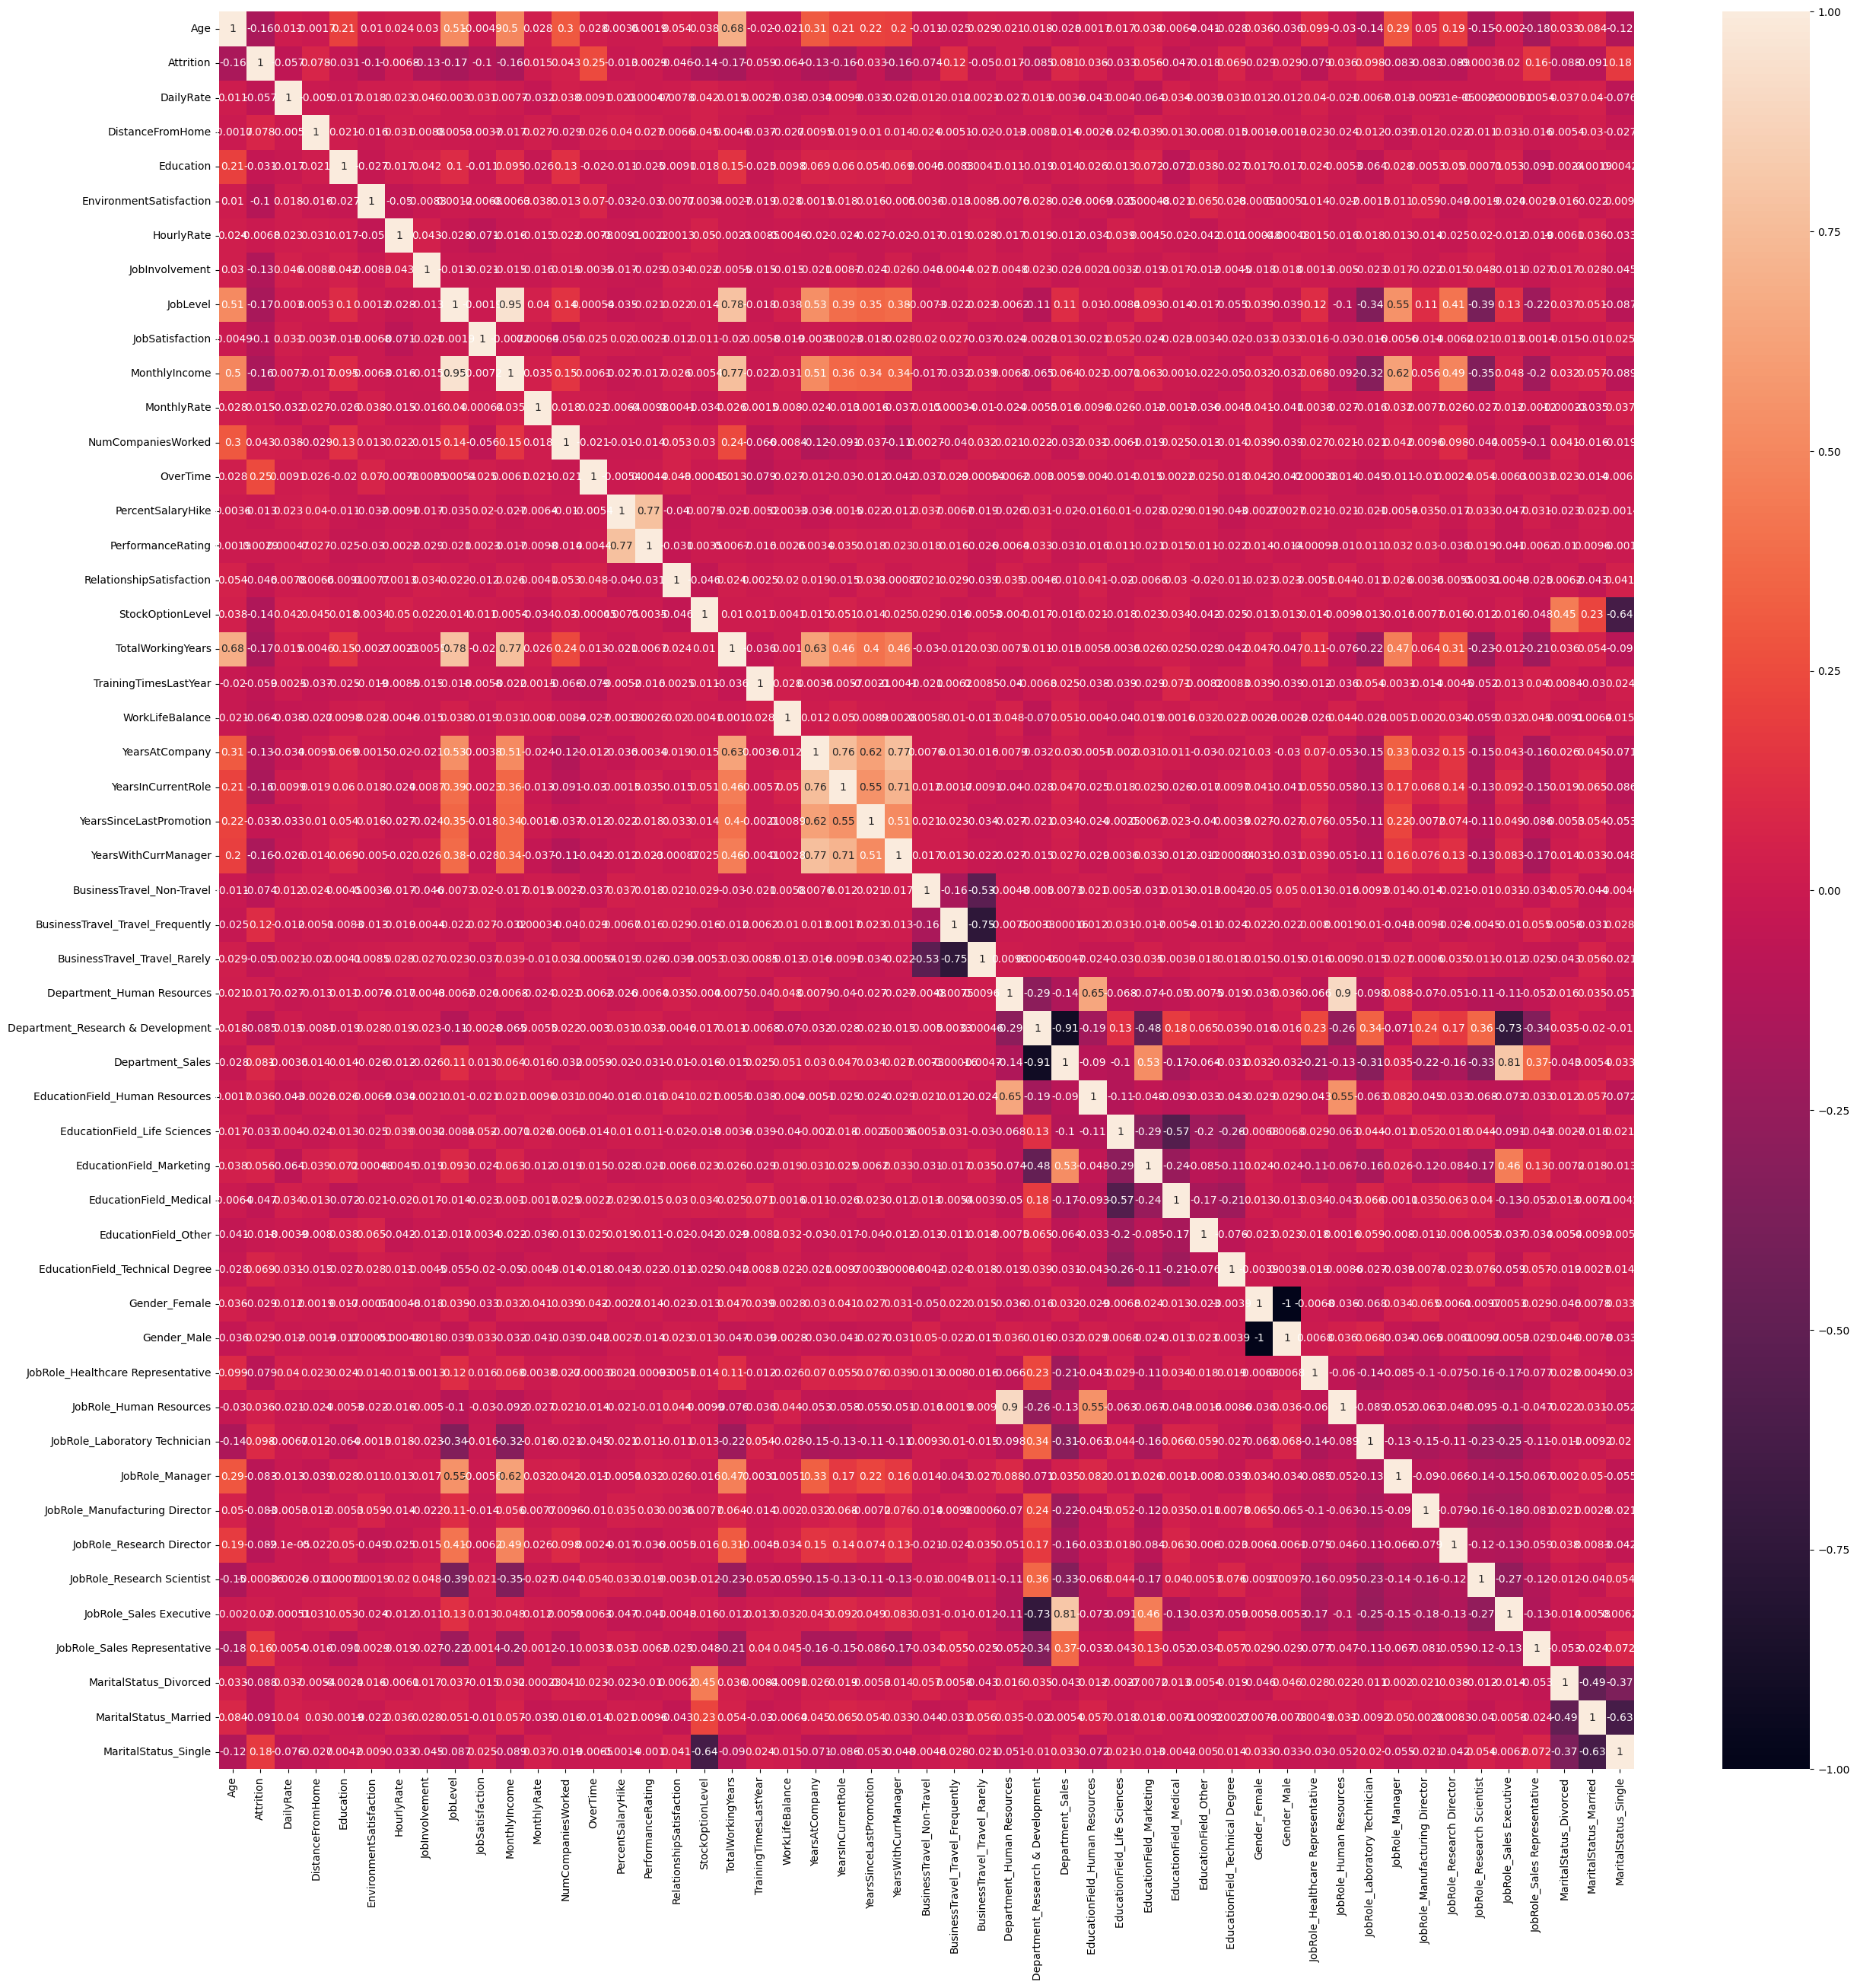

In [26]:
#vendo as correlações entre os atributos
correlacoes = base.corr()
fig, eixo = plt.subplots(figsize = (30,30))
sns.heatmap(correlacoes, annot = True)

In [27]:
# Calculando as correlações com o alvo
correlations = base.drop(columns=['Attrition']).apply(lambda x: x.corr(base['Attrition']))

# Obtendo as 10 maiores correlações
top_correlations = correlations.abs().nlargest(15)  # Selecionando as 15 maiores correlações em valor absoluto

# Verificando quais são as 15 top correlações entre os atributos e o target
print(top_correlations)

# Obtendo os nomes das colunas correspondentes às maiores correlações
top_columns = top_correlations.index.tolist()

print(top_columns)


OverTime                            0.246118
MaritalStatus_Single                0.175419
TotalWorkingYears                   0.171063
JobLevel                            0.169105
YearsInCurrentRole                  0.160545
MonthlyIncome                       0.159840
Age                                 0.159205
JobRole_Sales Representative        0.157234
YearsWithCurrManager                0.156199
StockOptionLevel                    0.137145
YearsAtCompany                      0.134392
JobInvolvement                      0.130016
BusinessTravel_Travel_Frequently    0.115143
JobSatisfaction                     0.103481
EnvironmentSatisfaction             0.103369
dtype: float64
['OverTime', 'MaritalStatus_Single', 'TotalWorkingYears', 'JobLevel', 'YearsInCurrentRole', 'MonthlyIncome', 'Age', 'JobRole_Sales Representative', 'YearsWithCurrManager', 'StockOptionLevel', 'YearsAtCompany', 'JobInvolvement', 'BusinessTravel_Travel_Frequently', 'JobSatisfaction', 'EnvironmentSatisfaction']


Com o objetivo de simplificar nossa análise, escolhi examinar a correlação dos 15 atributos mais importantes com nossa variável alvo. Isso ocorre porque a correlação dos demais atributos é baixa e terá pouco impacto em nossa análise. Dessa forma, para focar nos aspectos mais relevantes, irei analisar somente esses 15 atributos:

- **OverTime**: Se o funcionário trabalha horas extras (Sim, Não).
- **MaritalStatus_Single**: Estado civil do funcionário (Solteiro, Casado, Divorciado).
- **TotalWorkingYears**: Total de anos trabalhados pelo funcionário.
- **JobLevel**: Nível do cargo do funcionário.
- **YearsInCurrentRole**: Número de anos que o funcionário está no cargo atual.
- **MonthlyIncome**: Renda mensal do funcionário.
- **Age**: Idade do funcionário.
- **JobRole_Sales Representative**: Cargo do funcionário (Representante de Vendas).
- **YearsWithCurrManager**: Número de anos trabalhando com o gerente atual.
- **StockOptionLevel**: Nível de opção de compra de ações do funcionário.
- **YearsAtCompany**: Número de anos que o funcionário trabalhou na empresa atual.
- **JobInvolvement**: Nível de envolvimento com o trabalho (1: Baixo, 2: Médio, 3: Alto, 4: Muito Alto).
- **BusinessTravel_Travel_Frequently**: Nível de viagem de negócios do funcionário (Frequentemente).
- **JobSatisfaction**: Nível de satisfação com o trabalho (1: Baixo, 2: Médio, 3: Alto, 4: Muito Alto).
- **EnvironmentSatisfaction**: Nível de satisfação com o ambiente de trabalho (1: Baixo, 2: Médio, 3: Alto, 4: Muito Alto).



<ipython-input-28-635a4844f024>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(base_sairam['OverTime'], label = 'Funcionários que saíram', shade = True, color = 'r')
<ipython-input-28-635a4844f024>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(base_ficaram['OverTime'], label = 'Funcionários que ficaram', shade = True, color = 'b')


<Axes: xlabel='OverTime', ylabel='Density'>

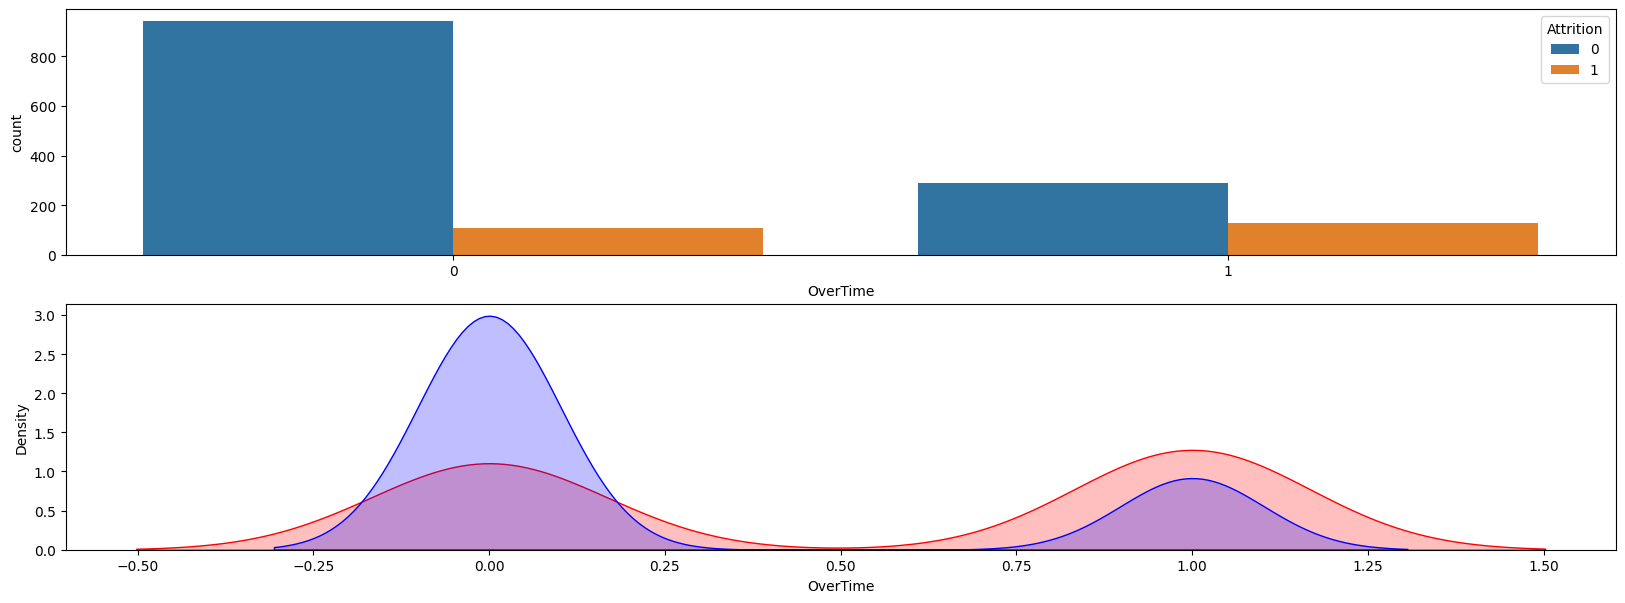

In [28]:
# Grafico da relação de 'OverTime' com Attrition
plt.figure(figsize=[20, 30])

plt.subplot(811)
sns.countplot(x='OverTime', hue = 'Attrition', data = base)

plt.subplot(812)
sns.kdeplot(base_sairam['OverTime'], label = 'Funcionários que saíram', shade = True, color = 'r')
sns.kdeplot(base_ficaram['OverTime'], label = 'Funcionários que ficaram', shade = True, color = 'b')

<ipython-input-29-5ef74816f15a>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(base_sairam['MaritalStatus_Single'], label = 'Funcionários que saíram', shade = True, color = 'r')
<ipython-input-29-5ef74816f15a>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(base_ficaram['MaritalStatus_Single'], label = 'Funcionários que ficaram', shade = True, color = 'b')


<Axes: xlabel='MaritalStatus_Single', ylabel='Density'>

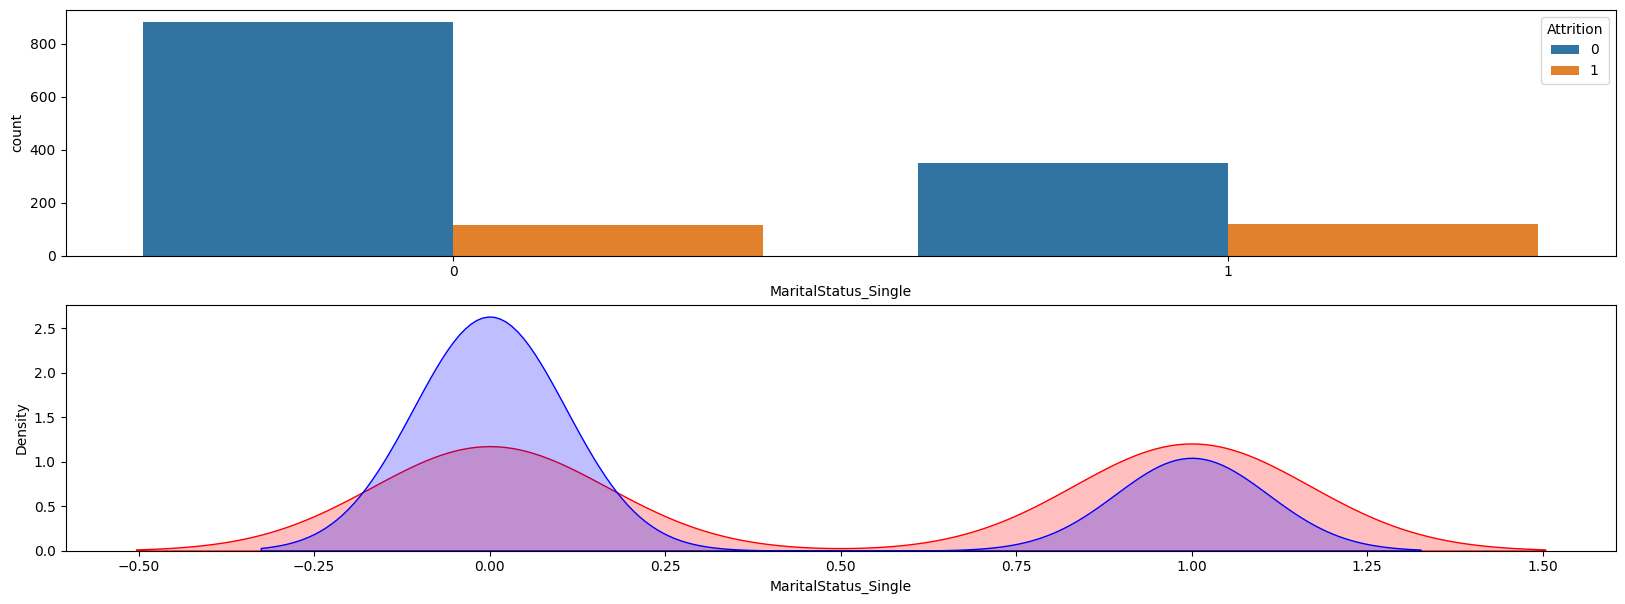

In [29]:
# Grafico da relação de 'MaritalStatus_Single' com Attrition
plt.figure(figsize=[20, 30])

plt.subplot(811)
sns.countplot(x='MaritalStatus_Single', hue = 'Attrition', data = base)

plt.subplot(812)
sns.kdeplot(base_sairam['MaritalStatus_Single'], label = 'Funcionários que saíram', shade = True, color = 'r')
sns.kdeplot(base_ficaram['MaritalStatus_Single'], label = 'Funcionários que ficaram', shade = True, color = 'b')

<ipython-input-30-2fa697f5ded7>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(base_sairam['TotalWorkingYears'], label = 'Funcionários que saíram', shade = True, color = 'r')
<ipython-input-30-2fa697f5ded7>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(base_ficaram['TotalWorkingYears'], label = 'Funcionários que ficaram', shade = True, color = 'b')


<Axes: xlabel='TotalWorkingYears', ylabel='Density'>

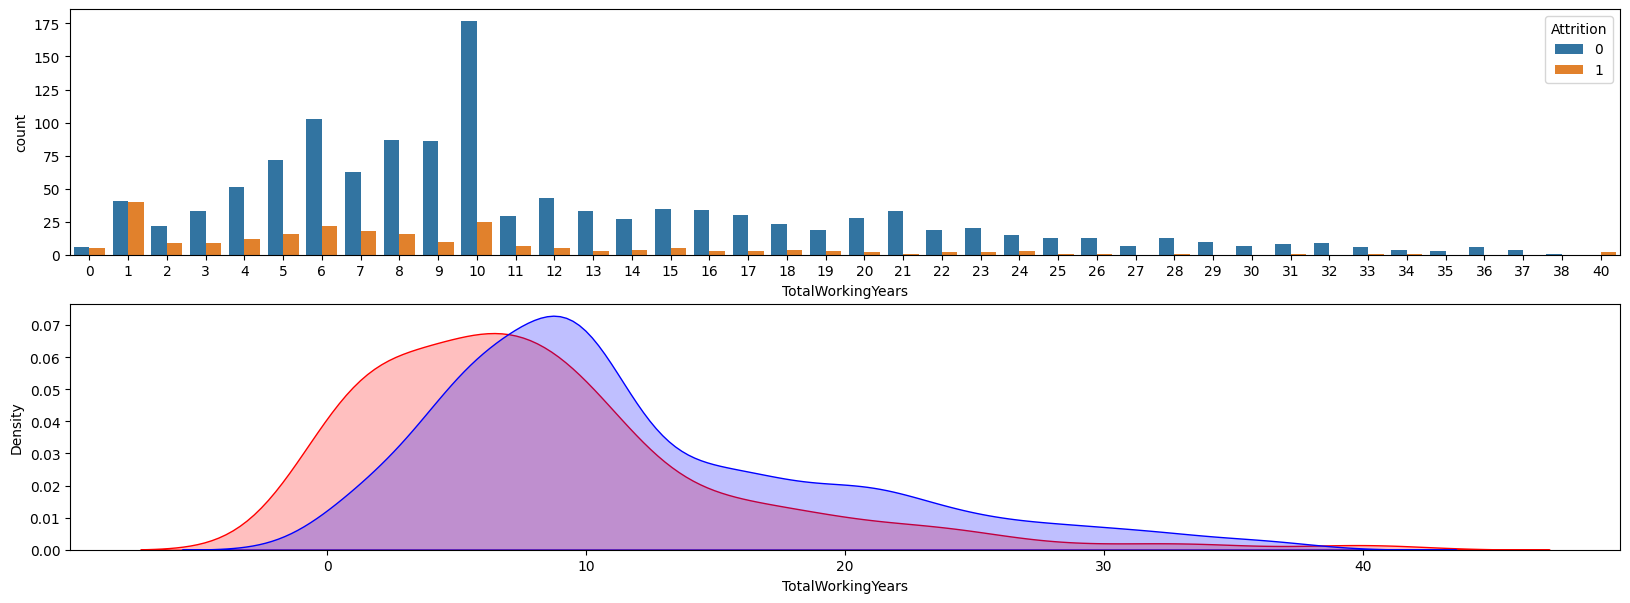

In [30]:
# Grafico da relação de 'TotalWorkingYears' com Attrition
plt.figure(figsize=[20, 30])

plt.subplot(811)
sns.countplot(x='TotalWorkingYears', hue = 'Attrition', data = base)

plt.subplot(812)
sns.kdeplot(base_sairam['TotalWorkingYears'], label = 'Funcionários que saíram', shade = True, color = 'r')
sns.kdeplot(base_ficaram['TotalWorkingYears'], label = 'Funcionários que ficaram', shade = True, color = 'b')

<ipython-input-31-099b190f9258>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(base_sairam['JobLevel'], label = 'Funcionários que saíram', shade = True, color = 'r')
<ipython-input-31-099b190f9258>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(base_ficaram['JobLevel'], label = 'Funcionários que ficaram', shade = True, color = 'b')


<Axes: xlabel='JobLevel', ylabel='Density'>

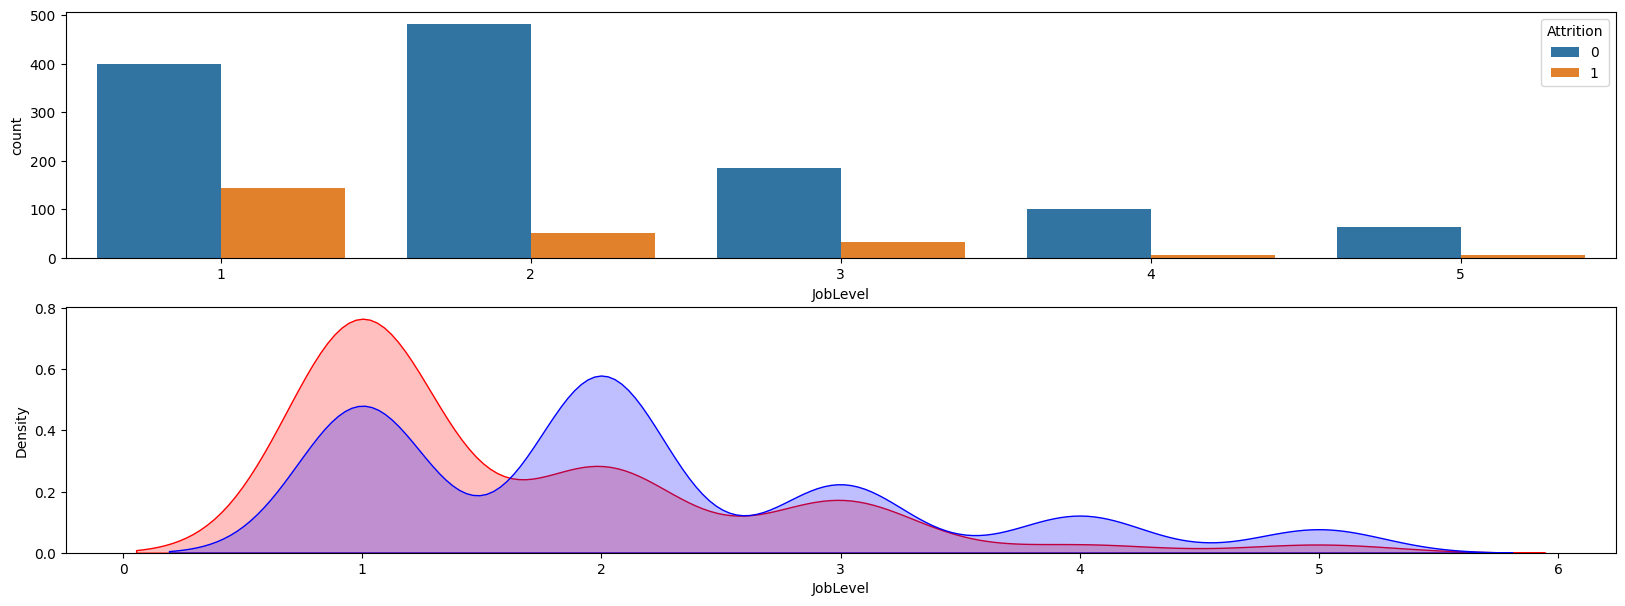

In [31]:
# Grafico da relação de 'JobLevel' com Attrition
plt.figure(figsize=[20, 30])

plt.subplot(811)
sns.countplot(x='JobLevel', hue = 'Attrition', data = base)

plt.subplot(812)
sns.kdeplot(base_sairam['JobLevel'], label = 'Funcionários que saíram', shade = True, color = 'r')
sns.kdeplot(base_ficaram['JobLevel'], label = 'Funcionários que ficaram', shade = True, color = 'b')

<ipython-input-32-119f727098d5>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(base_sairam['YearsInCurrentRole'], label = 'Funcionários que saíram', shade = True, color = 'r')
<ipython-input-32-119f727098d5>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(base_ficaram['YearsInCurrentRole'], label = 'Funcionários que ficaram', shade = True, color = 'b')


<Axes: xlabel='YearsInCurrentRole', ylabel='Density'>

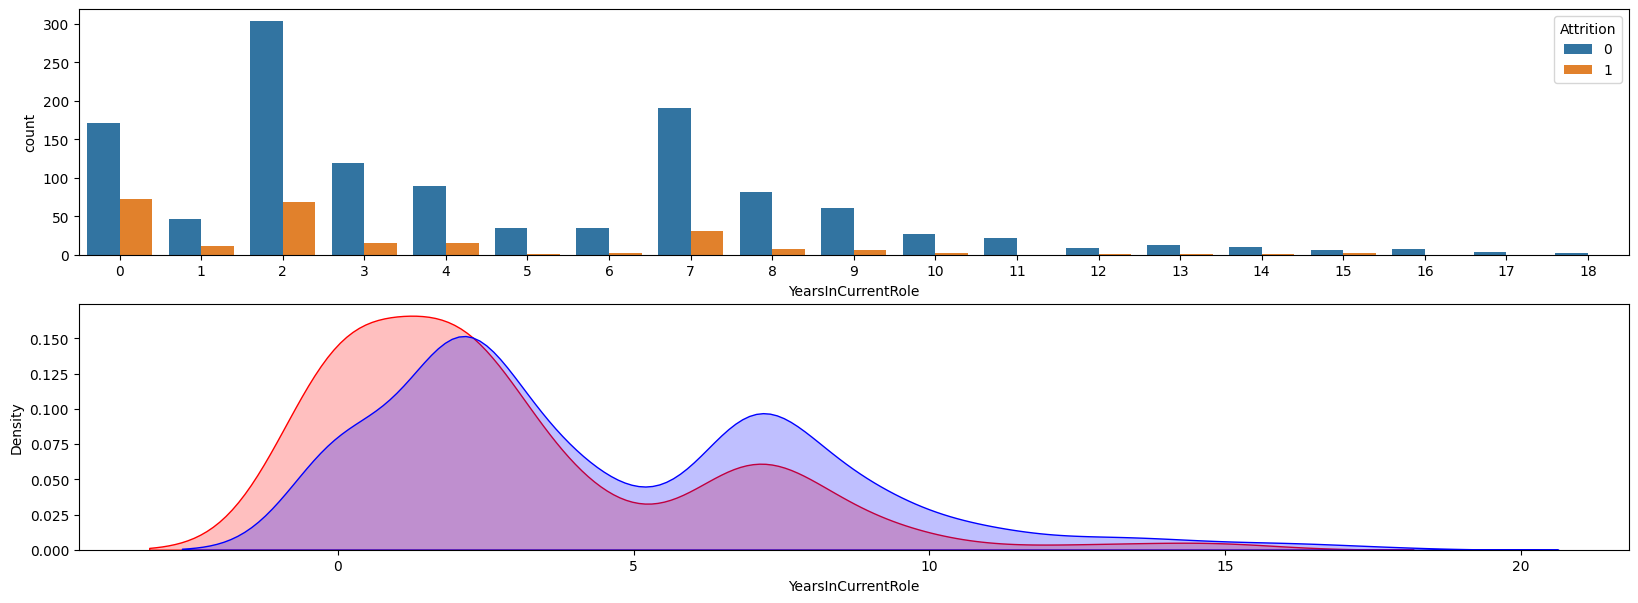

In [32]:
# Grafico da relação de 'YearsInCurrentRole' com Attrition
plt.figure(figsize=[20, 30])

plt.subplot(811)
sns.countplot(x='YearsInCurrentRole', hue = 'Attrition', data = base)

plt.subplot(812)
sns.kdeplot(base_sairam['YearsInCurrentRole'], label = 'Funcionários que saíram', shade = True, color = 'r')
sns.kdeplot(base_ficaram['YearsInCurrentRole'], label = 'Funcionários que ficaram', shade = True, color = 'b')

<ipython-input-33-a75423e9d82b>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(base_sairam['Age'], label = 'Funcionários que saíram', shade = True, color = 'r')
<ipython-input-33-a75423e9d82b>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(base_ficaram['Age'], label = 'Funcionários que ficaram', shade = True, color = 'b')


<Axes: xlabel='Age', ylabel='Density'>

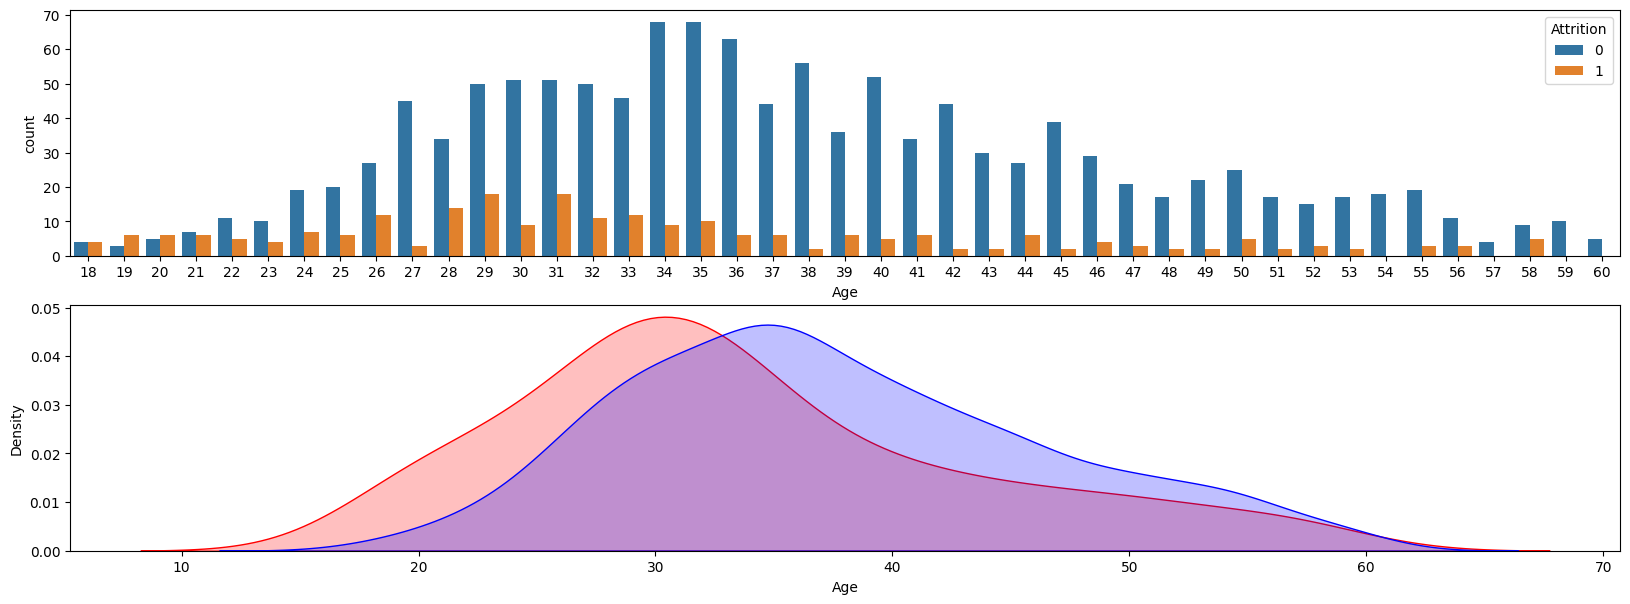

In [33]:
# Grafico da relação de 'Age' com Attrition
plt.figure(figsize=[20, 30])

plt.subplot(811)
sns.countplot(x='Age', hue = 'Attrition', data = base)

plt.subplot(812)
sns.kdeplot(base_sairam['Age'], label = 'Funcionários que saíram', shade = True, color = 'r')
sns.kdeplot(base_ficaram['Age'], label = 'Funcionários que ficaram', shade = True, color = 'b')

<ipython-input-34-a2265ea50c19>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(base_sairam['JobInvolvement'], label = 'Funcionários que saíram', shade = True, color = 'r')
<ipython-input-34-a2265ea50c19>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(base_ficaram['JobInvolvement'], label = 'Funcionários que ficaram', shade = True, color = 'b')


<Axes: xlabel='JobInvolvement', ylabel='Density'>

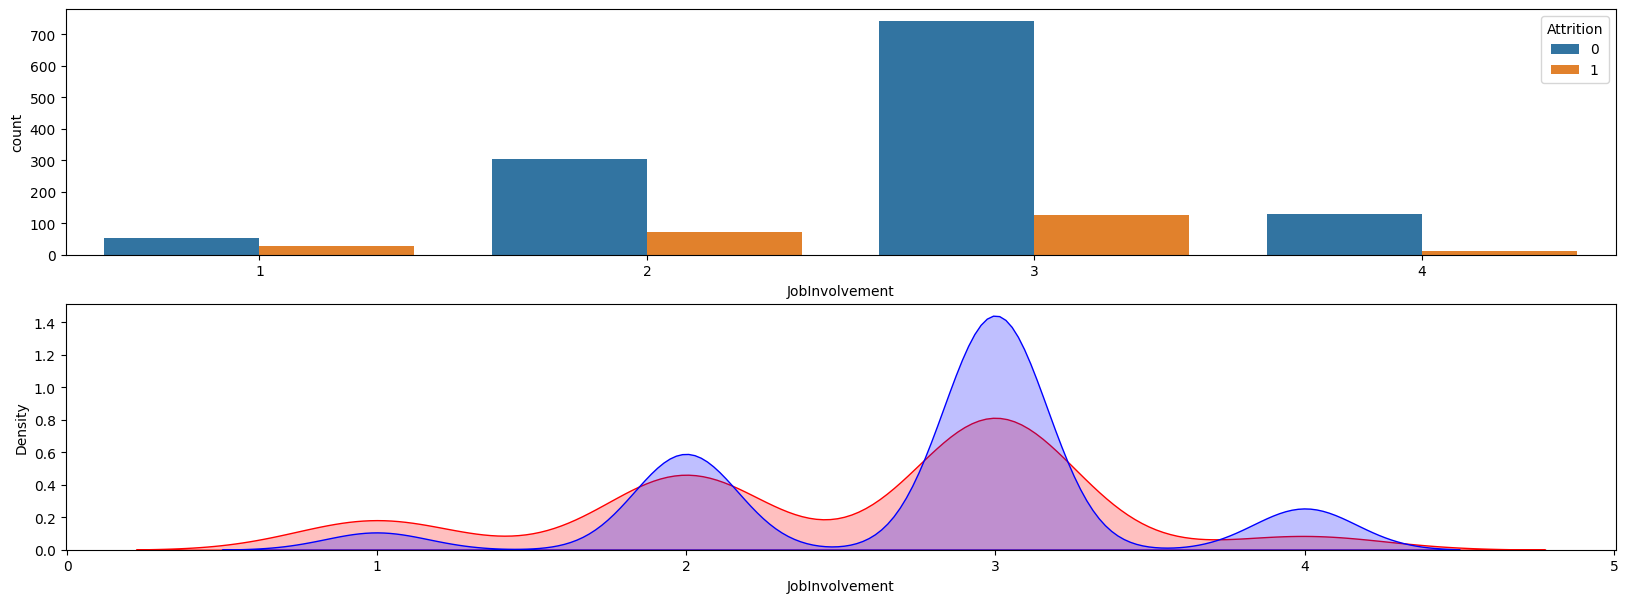

In [34]:
# Grafico da relação de 'JobInvolvement' com Attrition
plt.figure(figsize=[20, 30])

plt.subplot(811)
sns.countplot(x='JobInvolvement', hue = 'Attrition', data = base)

plt.subplot(812)
sns.kdeplot(base_sairam['JobInvolvement'], label = 'Funcionários que saíram', shade = True, color = 'r')
sns.kdeplot(base_ficaram['JobInvolvement'], label = 'Funcionários que ficaram', shade = True, color = 'b')

<ipython-input-35-a1b98e6fe125>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(base_sairam['StockOptionLevel'], label = 'Funcionários que saíram', shade = True, color = 'r')
<ipython-input-35-a1b98e6fe125>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(base_ficaram['StockOptionLevel'], label = 'Funcionários que ficaram', shade = True, color = 'b')


<Axes: xlabel='StockOptionLevel', ylabel='Density'>

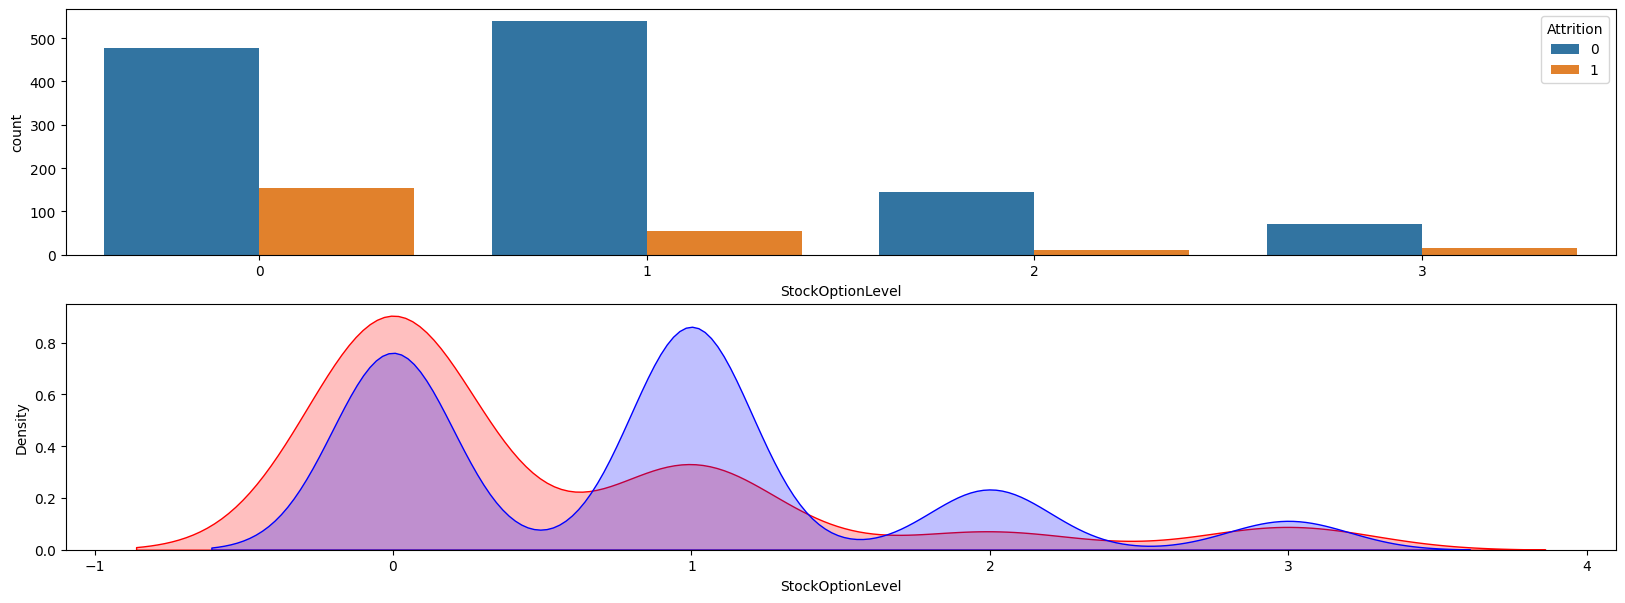

In [35]:
# Grafico da relação de 'StockOptionLevel' com Attrition
plt.figure(figsize=[20, 30])

plt.subplot(811)
sns.countplot(x='StockOptionLevel', hue = 'Attrition', data = base)

plt.subplot(812)
sns.kdeplot(base_sairam['StockOptionLevel'], label = 'Funcionários que saíram', shade = True, color = 'r')
sns.kdeplot(base_ficaram['StockOptionLevel'], label = 'Funcionários que ficaram', shade = True, color = 'b')

<ipython-input-36-b6bc2f8e777f>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(base_sairam['YearsAtCompany'], label = 'Funcionários que saíram', shade = True, color = 'r')
<ipython-input-36-b6bc2f8e777f>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(base_ficaram['YearsAtCompany'], label = 'Funcionários que ficaram', shade = True, color = 'b')


<Axes: xlabel='YearsAtCompany', ylabel='Density'>

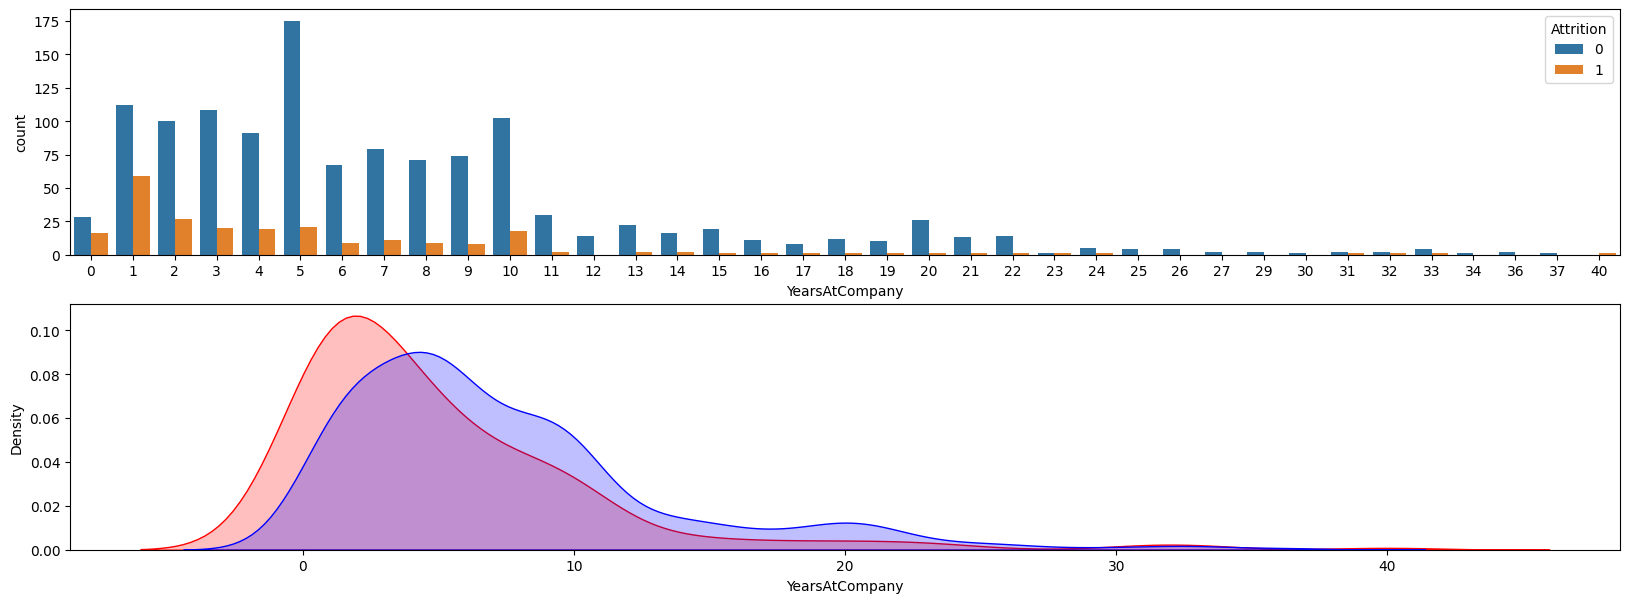

In [36]:
# Grafico da relação de 'YearsAtCompany' com Attrition
plt.figure(figsize=[20, 30])

plt.subplot(811)
sns.countplot(x='YearsAtCompany', hue = 'Attrition', data = base)

plt.subplot(812)
sns.kdeplot(base_sairam['YearsAtCompany'], label = 'Funcionários que saíram', shade = True, color = 'r')
sns.kdeplot(base_ficaram['YearsAtCompany'], label = 'Funcionários que ficaram', shade = True, color = 'b')

<ipython-input-37-ab2b9adac27a>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(base_sairam['YearsWithCurrManager'], label = 'Funcionários que saíram', shade = True, color = 'r')
<ipython-input-37-ab2b9adac27a>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(base_ficaram['YearsWithCurrManager'], label = 'Funcionários que ficaram', shade = True, color = 'b')


<Axes: xlabel='YearsWithCurrManager', ylabel='Density'>

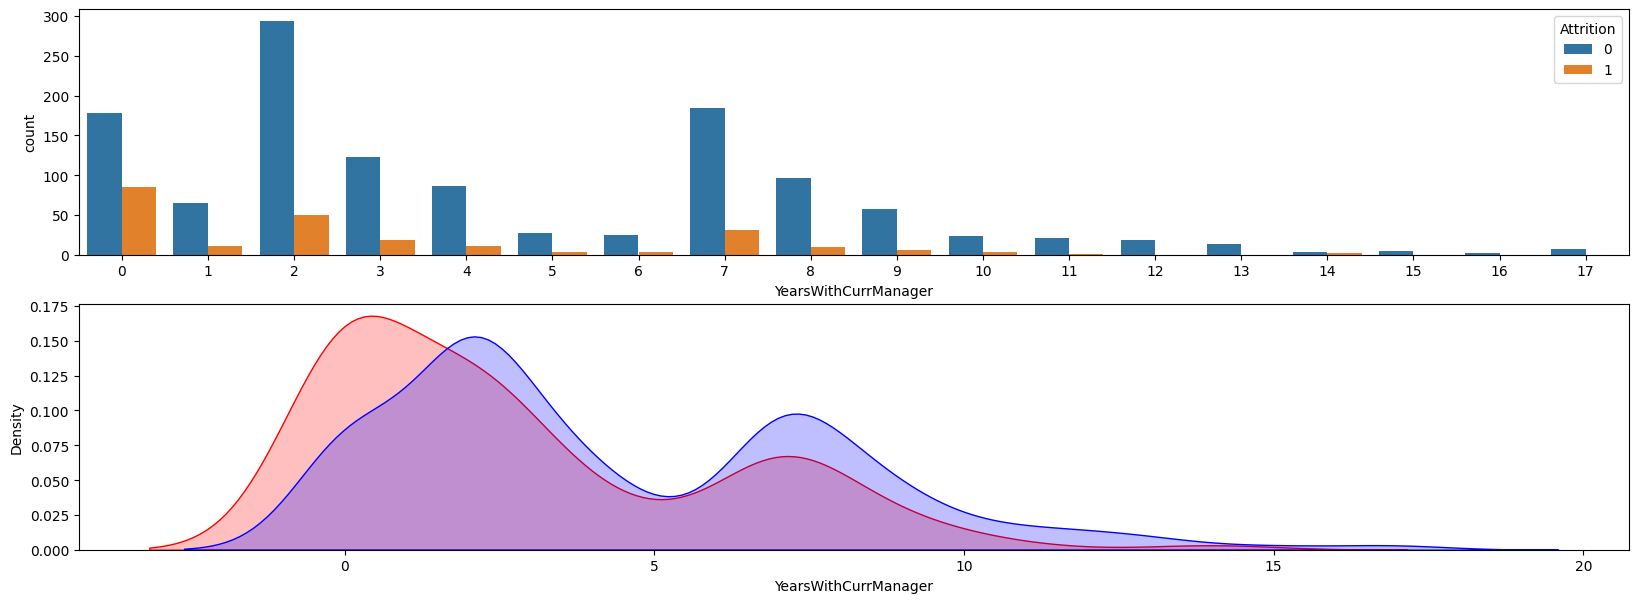

In [37]:
# Grafico da relação de 'YearsWithCurrManager' com Attrition
plt.figure(figsize=[20, 30])

plt.subplot(811)
sns.countplot(x='YearsWithCurrManager', hue = 'Attrition', data = base)

plt.subplot(812)
sns.kdeplot(base_sairam['YearsWithCurrManager'], label = 'Funcionários que saíram', shade = True, color = 'r')
sns.kdeplot(base_ficaram['YearsWithCurrManager'], label = 'Funcionários que ficaram', shade = True, color = 'b')

<ipython-input-38-16fdb6145b5d>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(base_sairam['BusinessTravel_Travel_Frequently'], label = 'Funcionários que saíram', shade = True, color = 'r')
<ipython-input-38-16fdb6145b5d>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(base_ficaram['BusinessTravel_Travel_Frequently'], label = 'Funcionários que ficaram', shade = True, color = 'b')


<Axes: xlabel='BusinessTravel_Travel_Frequently', ylabel='Density'>

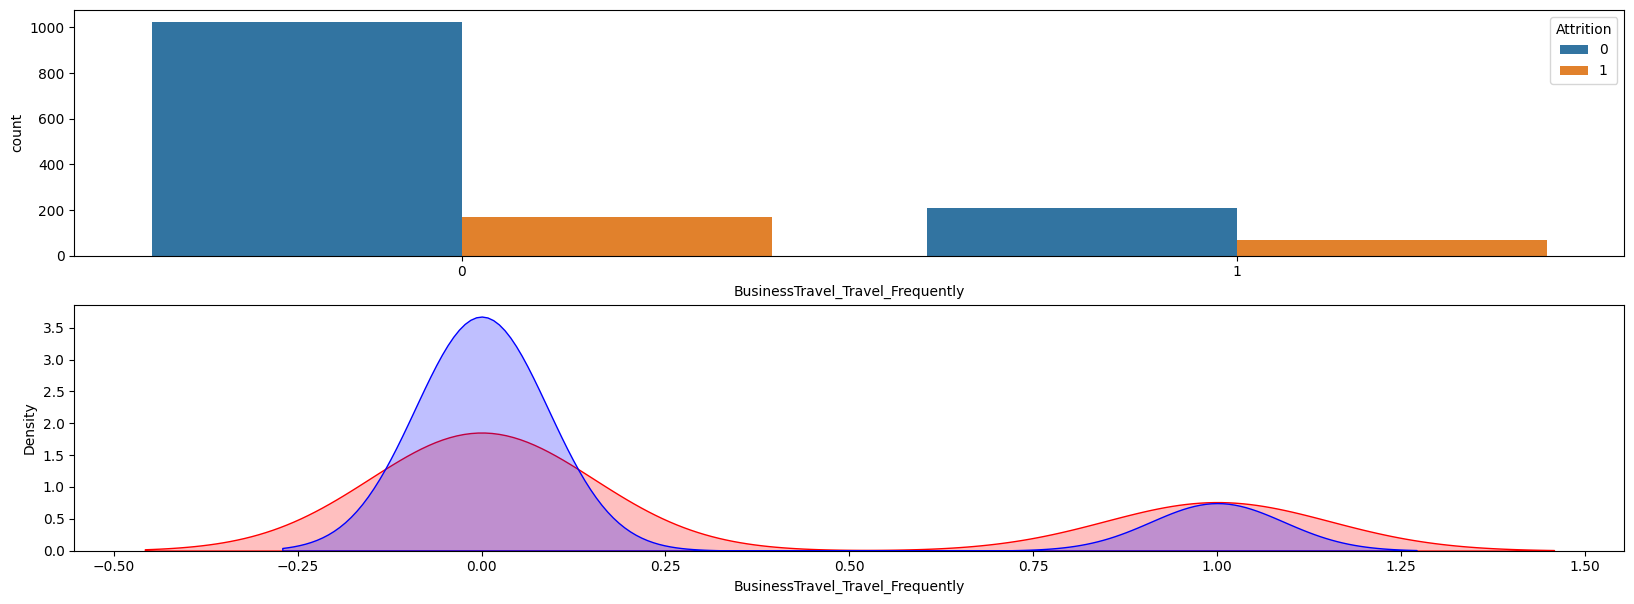

In [38]:
# Grafico da relação de 'BusinessTravel_Travel_Frequently' com Attrition
plt.figure(figsize=[20, 30])

plt.subplot(811)
sns.countplot(x='BusinessTravel_Travel_Frequently', hue = 'Attrition', data = base)

plt.subplot(812)
sns.kdeplot(base_sairam['BusinessTravel_Travel_Frequently'], label = 'Funcionários que saíram', shade = True, color = 'r')
sns.kdeplot(base_ficaram['BusinessTravel_Travel_Frequently'], label = 'Funcionários que ficaram', shade = True, color = 'b')

<ipython-input-39-e6b710a3bd27>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(base_sairam['JobSatisfaction'], label = 'Funcionários que saíram', shade = True, color = 'r')
<ipython-input-39-e6b710a3bd27>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(base_ficaram['JobSatisfaction'], label = 'Funcionários que ficaram', shade = True, color = 'b')


<Axes: xlabel='JobSatisfaction', ylabel='Density'>

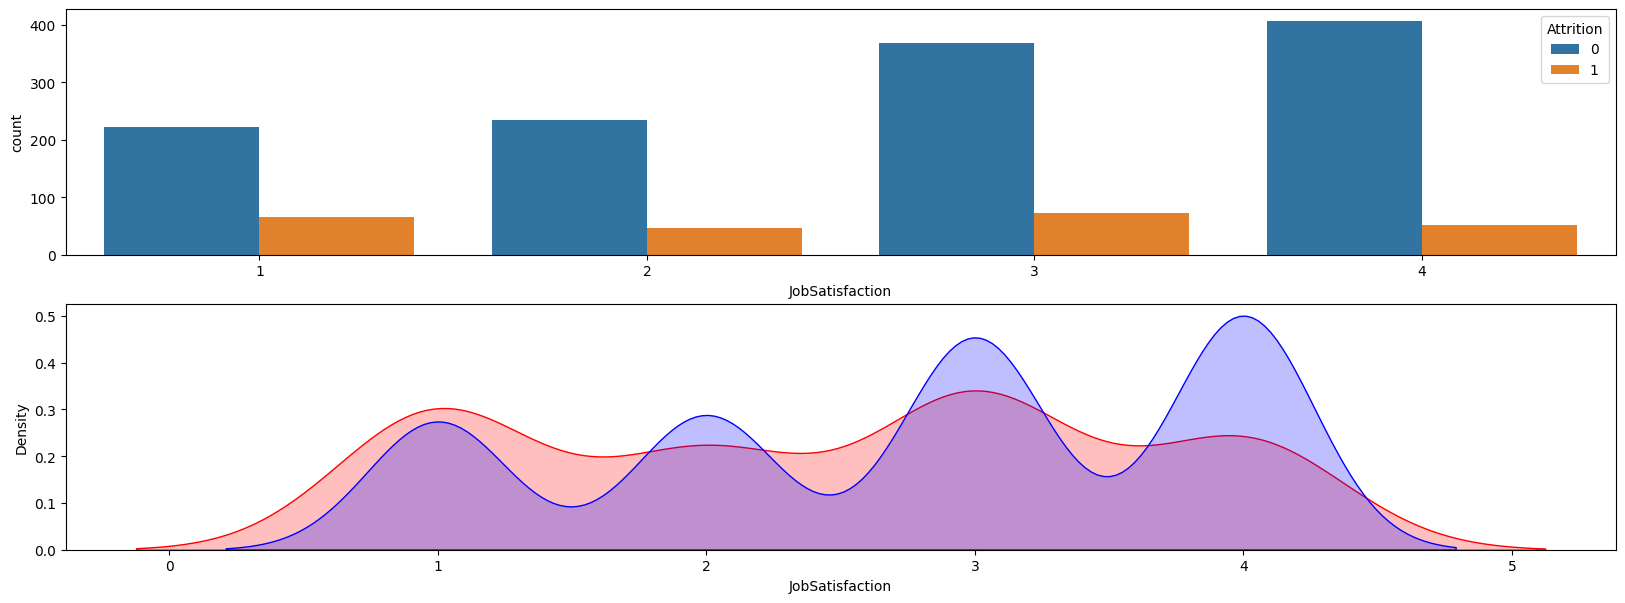

In [39]:
# Grafico da relação de 'JobSatisfaction' com Attrition
plt.figure(figsize=[20, 30])

plt.subplot(811)
sns.countplot(x='JobSatisfaction', hue = 'Attrition', data = base)

plt.subplot(812)
sns.kdeplot(base_sairam['JobSatisfaction'], label = 'Funcionários que saíram', shade = True, color = 'r')
sns.kdeplot(base_ficaram['JobSatisfaction'], label = 'Funcionários que ficaram', shade = True, color = 'b')

<ipython-input-40-19f0bce0aba3>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(base_sairam['JobRole_Sales Representative'], label = 'Funcionários que saíram', shade = True, color = 'r')
<ipython-input-40-19f0bce0aba3>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(base_ficaram['JobRole_Sales Representative'], label = 'Funcionários que ficaram', shade = True, color = 'b')


<Axes: xlabel='JobRole_Sales Representative', ylabel='Density'>

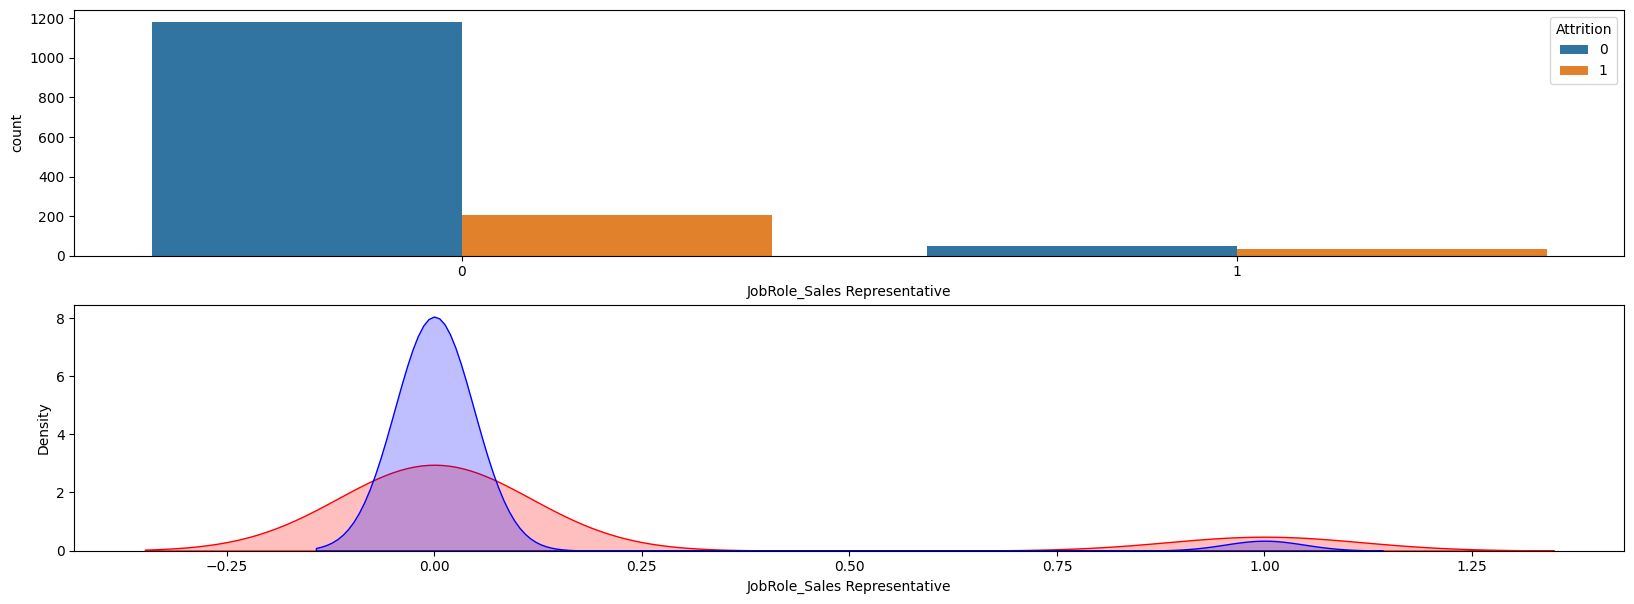

In [40]:
# Grafico da relação de 'JobRole_Sales Representative' com Attritionn
plt.figure(figsize=[20, 30])

plt.subplot(811)
sns.countplot(x='JobRole_Sales Representative', hue = 'Attrition', data = base)

plt.subplot(812)
sns.kdeplot(base_sairam['JobRole_Sales Representative'], label = 'Funcionários que saíram', shade = True, color = 'r')
sns.kdeplot(base_ficaram['JobRole_Sales Representative'], label = 'Funcionários que ficaram', shade = True, color = 'b')


<ipython-input-41-24ff61003ddc>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(base_sairam['MonthlyIncome'], label = 'Funcionários que saíram', shade = True, color = 'r')
<ipython-input-41-24ff61003ddc>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(base_ficaram['MonthlyIncome'], label = 'Funcionários que ficaram', shade = True, color = 'b')


<Axes: xlabel='MonthlyIncome', ylabel='Density'>

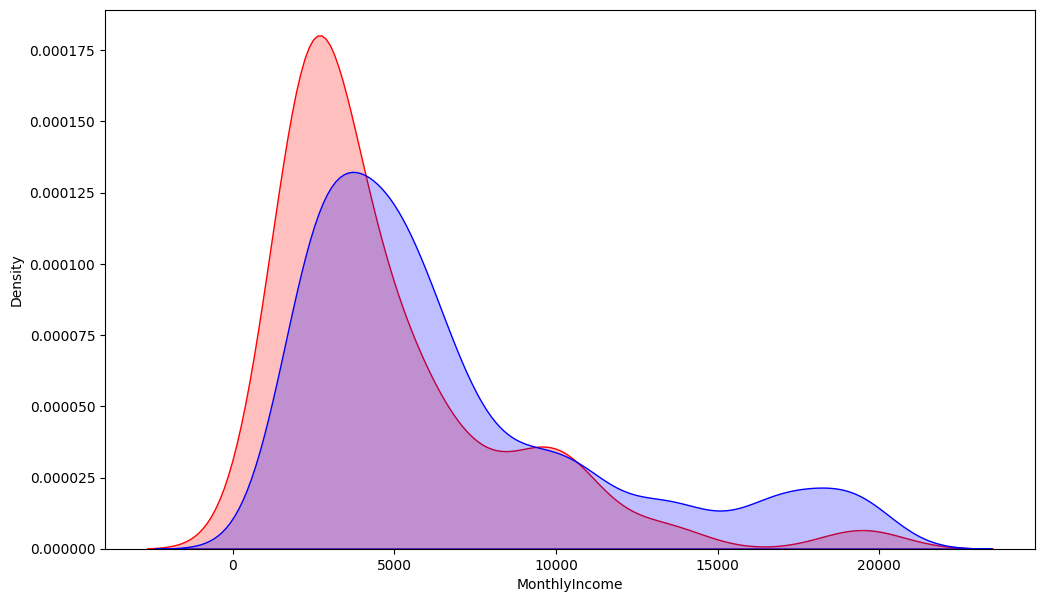

In [41]:
# Grafico da relação de 'MonthlyIncome' com Attrition
plt.figure(figsize = (12,7))
sns.kdeplot(base_sairam['MonthlyIncome'], label = 'Funcionários que saíram', shade = True, color = 'r')
sns.kdeplot(base_ficaram['MonthlyIncome'], label = 'Funcionários que ficaram', shade = True, color = 'b')

<ipython-input-42-0b7daaea31dc>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(base_sairam['EnvironmentSatisfaction'], label = 'Funcionários que saíram', shade = True, color = 'r')
<ipython-input-42-0b7daaea31dc>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(base_ficaram['EnvironmentSatisfaction'], label = 'Funcionários que ficaram', shade = True, color = 'b')


<Axes: xlabel='EnvironmentSatisfaction', ylabel='Density'>

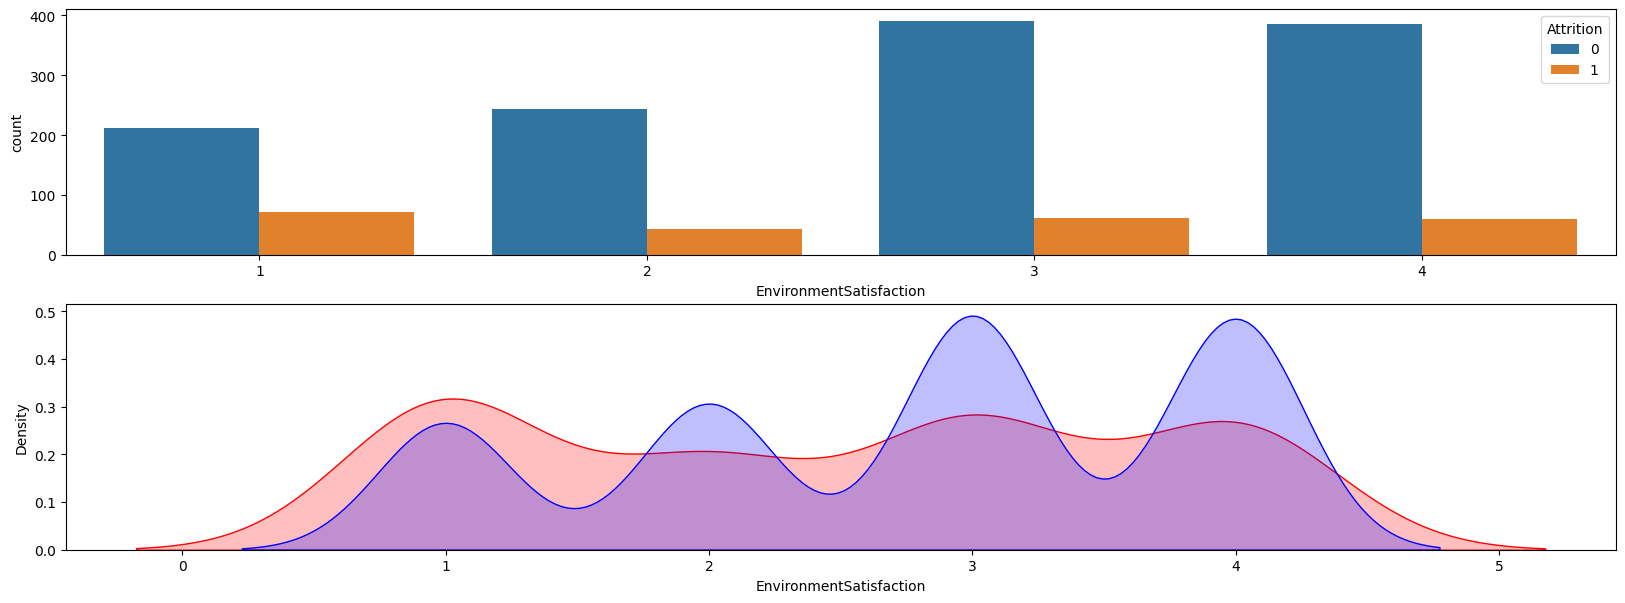

In [42]:
# Grafico da relação de 'EnvironmentSatisfaction ' com Attritionn
plt.figure(figsize=[20, 30])

plt.subplot(811)
sns.countplot(x='EnvironmentSatisfaction', hue = 'Attrition', data = base)

plt.subplot(812)
sns.kdeplot(base_sairam['EnvironmentSatisfaction'], label = 'Funcionários que saíram', shade = True, color = 'r')
sns.kdeplot(base_ficaram['EnvironmentSatisfaction'], label = 'Funcionários que ficaram', shade = True, color = 'b')

### Relatório dos 15 principais atributos:

- **OverTime**: Funcionários que não trabalham horas extras têm menor probabilidade de churn. Isso pode ocorrer porque o excesso de trabalho pode levar à insatisfação e ao esgotamento. **Sugestão de melhoria**: Implementar políticas que incentivem o equilíbrio entre trabalho e vida pessoal, limitando o número de horas extras e promovendo um ambiente de trabalho saudável.

- **MaritalStatus_Single**: Funcionários que não são solteiros têm menor probabilidade de churn. Isso pode estar relacionado ao apoio familiar e estabilidade emocional que podem influenciar na permanência na empresa. **Sugestão de melhoria**: Oferecer benefícios familiares, como assistência à saúde e flexibilidade de horários, para promover o bem-estar dos funcionários.

- **TotalWorkingYears**: Funcionários com mais tempo de trabalho têm menor probabilidade de churn. Isso sugere que a experiência e a familiaridade com a empresa podem influenciar na decisão de permanecer. **Sugestão de melhoria**: Implementar programas de desenvolvimento profissional e oportunidades de crescimento para incentivar a permanência dos funcionários a longo prazo.

- **JobLevel**: Funcionários com níveis mais baixos têm maior probabilidade de churn, especialmente no nível 1. Isso pode ser devido à falta de perspectiva de progressão na carreira. **Sugestão de melhoria**: Criar planos de carreira claros e oferecer oportunidades de promoção interna para motivar os funcionários a permanecer na empresa.

- **YearsInCurrentRole**: Funcionários com poucos anos no cargo tendem a sair mais, enquanto os com mais tempo têm maior probabilidade de ficar. **Sugestão de melhoria**: Implementar programas de capacitação e desenvolvimento para manter os funcionários engajados e motivados em seus cargos atuais.

- **Age**: Funcionários mais velhos têm menor probabilidade de churn. Isso pode ser devido à estabilidade financeira e menor propensão a mudanças de emprego. **Sugestão de melhoria**: Implementar políticas de retenção específicas para funcionários mais jovens, como programas de mentoria e oportunidades de crescimento.

- **JobInvolvement**: Funcionários mais envolvidos têm menor probabilidade de churn. Isso sugere que o engajamento com o trabalho pode influenciar na decisão de permanecer na empresa. **Sugestão de melhoria**: Promover um ambiente de trabalho positivo e reconhecer o esforço dos funcionários para aumentar o envolvimento e a satisfação no trabalho.

- **StockOptionLevel**: Funcionários com mais opções de compra de ações têm menor probabilidade de churn. Isso pode ser devido ao senso de pertencimento e interesse no sucesso da empresa. **Sugestão de melhoria**: Oferecer programas de participação nos lucros e ações da empresa para incentivar o comprometimento dos funcionários.

- **YearsAtCompany**: Funcionários com mais anos na empresa têm menor probabilidade de churn. Isso sugere que a fidelidade à empresa aumenta com o tempo. Sugestão de melhoria: Reconhecer e valorizar a experiência dos funcionários mais antigos, oferecendo benefícios e oportunidades de crescimento contínuo.

- **YearsWithCurrManager**: Funcionários com mais tempo com o mesmo gerente têm menor probabilidade de churn. Isso pode ser devido à relação de confiança e estabilidade que se desenvolve ao longo do tempo. **Sugestão de melhoria**: Promover a comunicação aberta e o feedback entre gerentes e funcionários para fortalecer o relacionamento e aumentar a retenção.

- **BusinessTravel_Travel_Frequently**: Funcionários que não viajam frequentemente têm menor probabilidade de churn. O desgaste causado por viagens constantes pode influenciar na decisão de deixar a empresa. **Sugestão de melhoria**: Oferecer benefícios e incentivos para funcionários que viajam frequentemente, como flexibilidade de horários e programas de recompensa.

- **JobSatisfaction**: Funcionários mais satisfeitos têm menor probabilidade de churn, especialmente os que estão no nível mais baixo de satisfação. **Sugestão de melhoria**: Realizar pesquisas de satisfação regularmente e implementar medidas para melhorar o ambiente de trabalho e a cultura organizacional.

- **JobRole_Sales Representative**: Representantes de vendas têm maior probabilidade de churn. Isso pode estar relacionado à pressão por metas e à natureza competitiva do cargo. **Sugestão de melhoria**: Oferecer suporte adicional e incentivos para os representantes de vendas, como treinamento especializado e reconhecimento por desempenho.

- **MonthlyIncome**: Funcionários com salários mais altos têm menor probabilidade de churn, mas há uma quebra no padrão em salários de 10.000. **Sugestão de melhoria**: Revisar a política salarial e garantir que os salários sejam competitivos e justos, levando em consideração o mercado e o desempenho individual dos funcionários.

- **EnvironmentSatisfaction**: Funcionários mais satisfeitos com o ambiente de trabalho têm menor probabilidade de churn. **Sugestão de melhori**a: Investir em melhorias no ambiente físico e promover uma cultura de respeito e colaboração para aumentar a satisfação dos funcionários.

**Conclusão**

A análise dos dados sugere que a retenção de talentos está diretamente ligada a diversos fatores, como equilíbrio entre trabalho e vida pessoal, oportunidades de crescimento, ambiente de trabalho positivo e reconhecimento. Implementar estratégias para melhorar esses aspectos pode ajudar a reduzir o churn e promover a retenção de funcionários qualificados.

## Pré-Processamento e bases de treino/teste

In [43]:
#Observando a base novamente
base.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,94,3,2,4,...,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,3,61,2,2,2,...,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,4,92,2,1,3,...,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,56,3,1,3,...,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,1,40,3,1,2,...,1,0,0,0,0,0,0,0,1,0


In [44]:
# Separando previsores e a coluna alvo

#Previsores
X = base[['BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single','Age', 'DailyRate', 'DistanceFromHome',
       'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'OverTime',
       'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',
       'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]

#Coluna Alvo
y = base['Attrition']

In [45]:
#Normalizando os dados para que os algoritmos não considerem alguns atributos mais impotantes que outros:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [46]:
# Separando em treino/teste:
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X , y, test_size = 0.25)

In [47]:
#Verificando os tamanhos dos conjuntos de treino
X_treino.shape, y_treino

((1102, 50),
 28      0
 519     0
 565     0
 773     0
 1456    0
        ..
 136     1
 468     0
 330     0
 1113    0
 1079    0
 Name: Attrition, Length: 1102, dtype: int64)

In [48]:
#Verificando os tamanhos dos conjuntos de treino
X_teste.shape, y_teste

((368, 50),
 678     0
 741     0
 331     0
 1358    0
 703     0
        ..
 201     0
 1055    0
 991     0
 366     1
 345     0
 Name: Attrition, Length: 368, dtype: int64)

## Criação de Modelos

O processo da criação de modelos será realizado nesse [notebook](https://colab.research.google.com/drive/1krdF9CDTflpSINfOohY6iqo0gXDRXQWF#scrollTo=MutNAK2I-KoQ). Esses modelos são fundamentais para o nosso projeto, pois nos ajudarão a entender melhor o comportamento dos funcionários que saem da empresa, permitindo que tomemos medidas proativas para reduzir o churn.